In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 

from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error

from sklearn.datasets import load_diabetes

In [2]:
df = load_diabetes()

In [4]:
print(df.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [7]:
X = df.data
y = df.target

In [10]:
X_train , X_test  ,y_train , y_test = train_test_split(X,y,test_size=.2 , random_state=45)

In [13]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.5188113124539249
RMSE 48.72713760953253


Now applying Ridge

In [18]:
from sklearn.linear_model import Ridge

In [19]:
R=Ridge(alpha=0.001)
R.fit(X_train,y_train)
y_pred = R.predict(X_test)

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.5201448351821765
RMSE 48.65957177859253


In [20]:
print(R.coef_)
print(R.intercept_)

[  24.01614407 -246.40604384  493.5928598   329.08832995 -852.76773624
  479.42466903  131.86682689  243.03291973  748.96464364   90.15508276]
152.12463296924477


In [31]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
from sklearn.linear_model import Ridge

R=Ridge(alpha=10111)
R.fit(X_train,y_train)
y_pred = R.predict(X_test)

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score -0.0001864684792911575
RMSE 70.2511896701654


In [32]:
from sklearn.linear_model import Ridge

R=Ridge()
R.fit(X_train,y_train)
y_pred = R.predict(X_test)

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.45671008338777064
RMSE 51.77606230385885


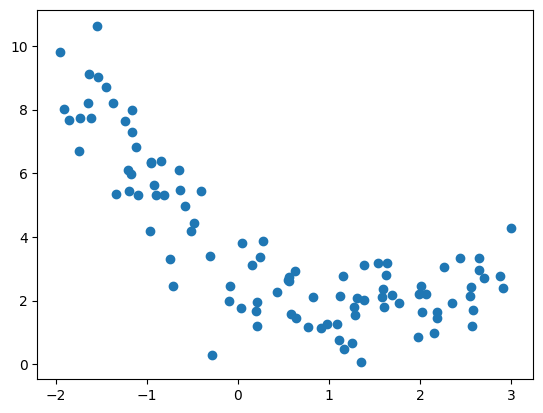

In [33]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

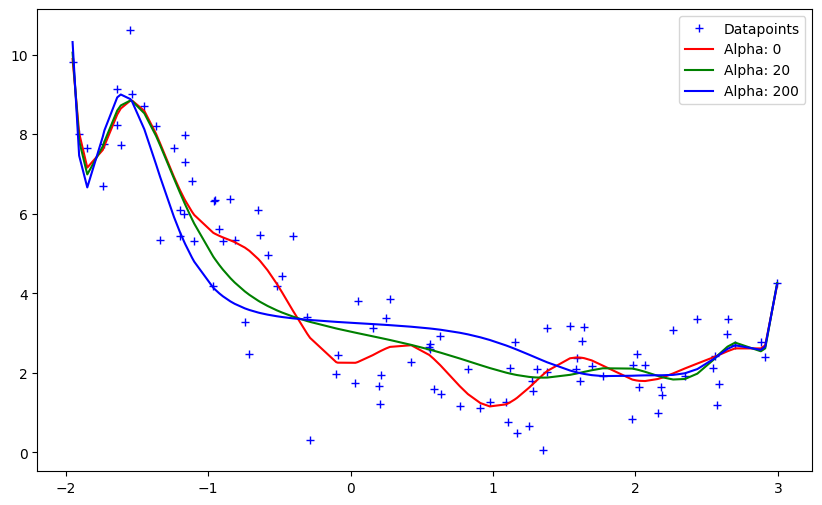

In [34]:
from sklearn.preprocessing import PolynomialFeatures
def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()